# Introduction

Thank you for taking our test! We look forward to reading your results.

- The test contains 2 sections. 
- You have 1 week to complete the test.
- We prefer if you use jupyter notebook to present your code and results. It is fine if you want to include additional libraries as separate python files. 
- If you don't have any python experience, you can use another language.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

# Task 1

Given the below information
- X1, X2 and X3 are the predictors
- Y is the target variable

Identify how is Y related to X1, X2 and X3 and fill the Y cells from row 15,000 onwards

Please note that the relationship is **fully deterministic** but there is more than 1 relationship.

Output: 

Please provide the file ML_test1.csv with rows 1 to 19,998 and do not remove in-sample rows (which are from 1 to 14,999).
Also, explain the relationships between Y and X1, X2 and X3 in the notebook.

In [618]:
# Below

In [619]:
df = pd.read_csv('./ML_test1.csv',index_col=None)
df.head()

,X1,X2,X3,Y
0,0.433278,-0.180904,-0.426411,0.614182
1,-0.461811,-0.204108,0.036119,-0.036119
2,-0.011897,-0.182808,0.256612,0.100000
3,-0.451108,-0.151159,-0.007978,0.007978
4,0.192973,-0.412564,0.107185,-0.112406


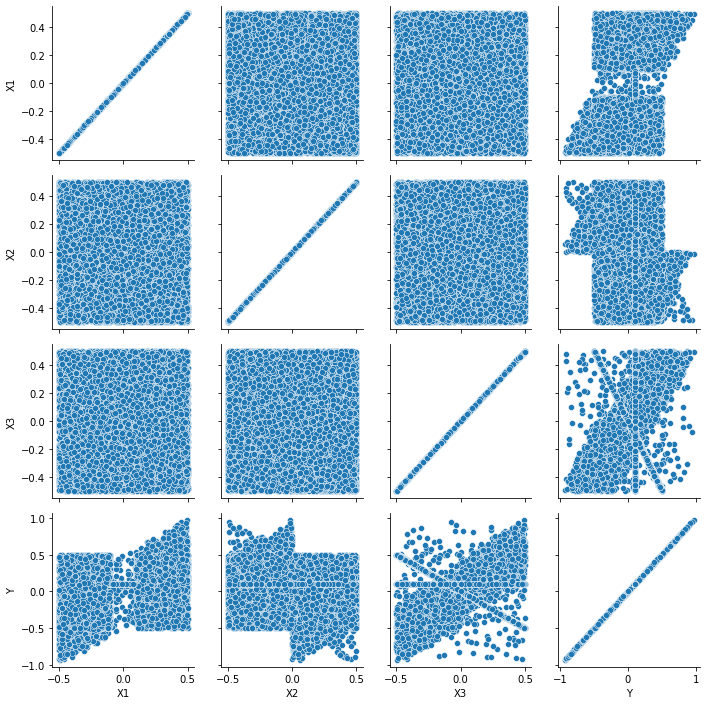

In [620]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

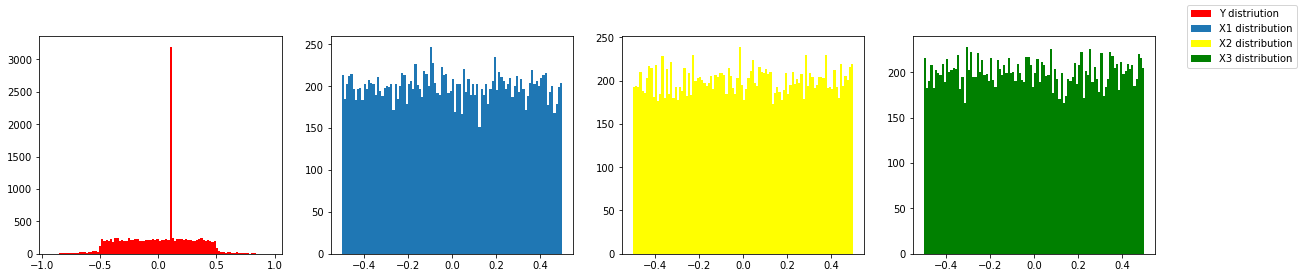

In [621]:
#Plot distribution of Y value
fig,ax = plt.subplots(1,4,figsize = (20,4))
ax[0].hist(df['Y'],bins = 100,label = 'Y distriution',color = 'red')
ax[1].hist(df['X1'],bins = 100, label = 'X1 distribution')
ax[2].hist(df['X2'],bins = 100,label = 'X2 distribution',color = 'yellow')
ax[3].hist(df['X3'],bins = 100,label = 'X3 distribution', color = 'green')

fig.legend()


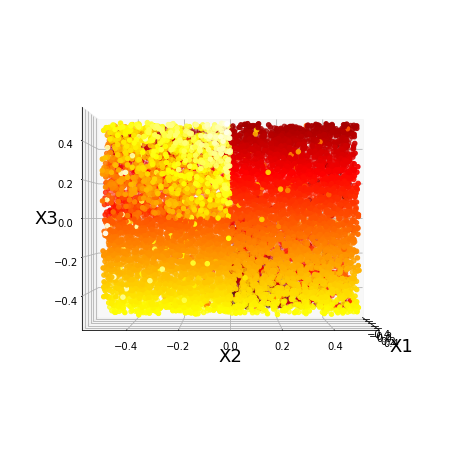

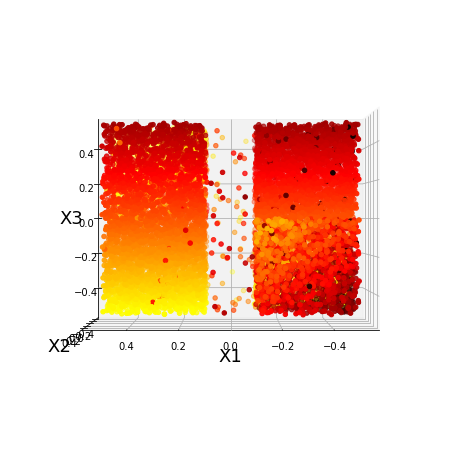

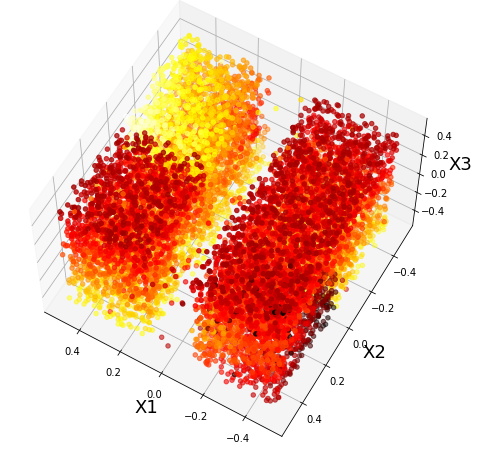

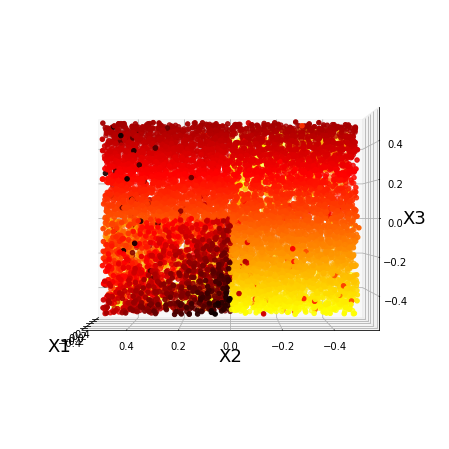

In [622]:
model_df = df.dropna()
model_df = model_df[model_df['Y']!=model_df.mode()['Y'][0]] #Remove outliers from the data => where Y=0.1, these values are outliers as the independent variables are unable to explain that
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111,projection='3d')
ax.view_init(0,0)
ax.scatter(model_df['X1'], model_df['X2'], model_df['X3'],c=model_df['Y'],cmap=plt.cm.hot)
ax.set_xlabel("X1", fontsize=18)
ax.set_ylabel("X2", fontsize=18)
ax.set_zlabel("X3", fontsize=18)

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111,projection='3d')
ax.view_init(0,90)
ax.scatter(model_df['X1'], model_df['X2'], model_df['X3'],c=model_df['Y'],cmap=plt.cm.hot)
ax.set_xlabel("X1", fontsize=18)
ax.set_ylabel("X2", fontsize=18)
ax.set_zlabel("X3", fontsize=18)
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111,projection='3d')
ax.view_init(60,120)
ax.scatter(model_df['X1'], model_df['X2'], model_df['X3'],c=model_df['Y'],cmap=plt.cm.hot)
ax.set_xlabel("X1", fontsize=18)
ax.set_ylabel("X2", fontsize=18)
ax.set_zlabel("X3", fontsize=18)
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111,projection='3d')
ax.view_init(0,180)
ax.scatter(model_df['X1'], model_df['X2'], model_df['X3'],c=model_df['Y'],cmap=plt.cm.hot)
ax.set_xlabel("X1", fontsize=18)
ax.set_ylabel("X2", fontsize=18)
ax.set_zlabel("X3", fontsize=18)

plt.show()

In [623]:
correlations  = model_df.corr()
correlations['Y'].sort_values(ascending = False)

Y     1.000000
X1    0.465542
X2   -0.327063
X3   -0.388628
Name: Y, dtype: float64

In [624]:

X = model_df[['X1','X2','X3']]
Y = model_df[['Y']]

#mds = MDS(n_components=2, random_state=42)
#X_reduced_mds = mds.fit_transform(X)

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

tsne = TSNE(n_components=2)
X_reduced_tsne = tsne.fit_transform(X)

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced_lle = lle.fit_transform(X)

KeyboardInterrupt: 

In [ ]:
plt.scatter(model_df['X2'],model_df['X3'],c=model_df['Y'],cmap = plt.cm.hot)
plt.colorbar()
plt.legend()
plt.show()

In [ ]:
#Grid Search
param_grid = [{'n_estimators': [100,200,500,1000], 'max_features': [1,2,3]},]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(x_train, y_train)
grid_search.best_params_

# Evaluate the model

In [ ]:

regr = RandomForestRegressor(n_estimators =1000,max_features =2, random_state=0,criterion ="mse")
x_train, x_test, y_train, y_test = train_test_split(X, Y,train_size=0.7)
regr.fit(x_train,y_train)


y_pred = regr.predict(x_test)

from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))


In [ ]:
train_x,train_y = model_df[['X1','X2','X3']],model_df['Y']
regr.fit(train_x,train_y)
y_pred = regr.predict(df[14998:][['X1','X2','X3']])
df.loc[14998:,'Y'] = list(y_pred)

In [ ]:
df

# Task 2

We give you the following data: 

- Market data: the market data will be available after today market close. 
    - openadj/closeadj are open/close price adjusted for corporate actions
    - adv: average daily volume in dollars 
    - market cap: total market value in million dollars
    - sector info: the sector classification of the instruments in this universe
    - if the market cap is null for a stock for one day, the stock is out of the universe
- Other predictors: they might have different update frequency. The predictors are available before today market open. 
    - technical indicator: it is derived from market data
    - holding indicator: this is the total value in dollars held by a group of institutional investors
    - 2 accounting statement items: net income and sales in million dollars 
         - the net income is cumulative over the course of the fiscal year, i.e., Q2 amount is given as Q1 + Q2; Q4 amount is given as Q1 + Q2 + Q3 + Q4.
         - the sales figure is non-cumulative.

## Instructions
We expect you to 
1. **Process the data:** identify potential data issues and clean the data accordingly 
2. **Describe the data:** you should try to understand the data (e.g. overall distribution, time-series dynamics etc.)
3. **Design a prediction model:** you should try to predict future stock returns based on all information given. 
   - We prefer not to bet on market direction. Your model should avoid MARKET exposure.
   - We prefer not to bet on large vs small stocks. Your model should avoid SIZE exposure.
   - Be careful about look-ahead bias.
   - Be careful about the fact that small stocks are much more expensive to trade. You don't want your model to be good at predicting small stocks and very bad at predicting large ones
4. **Provide us with a final conclusion:** you should include statistics, a summary of your attempts and potential future ideas.

## Evaluation

You will be evaluated based on the following criteria:

- 20% - **Code quality**
- 20% - **Presentation of results and explanations.** We should be able to understand what you did without reading the code.
- 20% - **Data analysis skills**
- 10% - **Creativity**
- 10% - **Prediction accuracy**

Good luck!

## First import all the relevant data and perform data cleaning
1. Stocks with sporadic missing values can be filled with some form of median or mean
2. Stocks with huge amount of missing values are hard to work with and I will remove them from my dataset.
3. Stocks in which the data for the predictors are missing in huge amounts is also useless and I will remove them from my dataset

#### Since we are intending to predict retunrs and the test has left it quite open-ended as to the type of returns, I will be using market data to predict returns on the daily. I will also build another model using the financial and holding indicator data as they are of different periodicty and would be more appropriate to be used to predict values of similar periodicity

Steps:
1. Clean the data
2. Data Exploration: Investigate relationships between returns data, marketcap, and volume
2. Sector data could be transformed via encoders into numerical values for prediction
3. Feature Selection: Choose the most appropriate type of data and a corresponding prediction model
4. Perform a train, validation and test split
5. Train the model, and tune hyperparameters with validation set
6. Evaluate models via Rsquared and RMSE\
7. Use test data for prediction

# Data Cleaning and Importing

In [252]:
'''
Raw predictors
'''
financial_indicator = pd.read_csv('./financial_indicator.csv', index_col=None) #Net income/Sales (Cumulative)
technical_indicator = pd.read_csv('./technical_indicator.csv', index_col=0) #Techincal Indicators
holding_indicator = pd.read_csv('./holding_indicator.csv', index_col=0) #Instutional investor holdings

'''
Market data
'''
op = pd.read_csv('./openadj.csv',index_col=0) #Opening Price
cp = pd.read_csv('./closeadj.csv',index_col=0) #Closing Price
adv = pd.read_csv('./adv.csv',index_col=0) #volume
cap = pd.read_csv('./market_cap.csv',index_col=0) #Market Cap
sector = pd.read_csv('./sectors.csv', index_col=0) # Sector

#Data Cleaning
sector = sector.fillna(method = 'ffill').fillna(method = 'bfill') #Forward and backward fill sector data as company do not change sectors
cap = cap.fillna(method = 'bfill')
cp = cp[cp.columns[cp.isnull().mean() == 0]] #Keep stocks in which all the closing price is available

#Adjust the data such that they have the same columns as well
op = op[cp.columns]
adv = adv[cp.columns]
sector = sector[cp.columns]
cap = cap[cp.columns]
technical_indicator = technical_indicator[cp.columns]


def conv_to_dt(df):
    df.index = pd.to_datetime(df.index)
    return df

rs = 'M'
dataset=[]
for data in [cp,op,adv,sector,technical_indicator,cap,holding_indicator]:
    data = data.fillna(data.median())
    data.replace([np.inf, -np.inf], 0, inplace=True)
    dataset.append(conv_to_dt(data))
d = []
for data in dataset:
    d.append(data.resample(rs).last())

cp,op,adv,sector,technical_indicator,cap,holding_indicator = d[0],d[1],d[2],d[3],d[4],d[5],d[6]
#cp,op,adv,sector,technical_indicator,cap,holding_indicator = conv_to_dt(cp),conv_to_dt(op),conv_to_dt(adv),conv_to_dt(sector),conv_to_dt(technical_indicator),conv_to_dt(cap),conv_to_dt(holding_indicator)
#cp,op,adv,sector,technical_indicator,cap,holding_indicator = cp.resample(rs).last(), op.resample(rs).last(), adv.resample(rs).last(), sector.resample(rs).last(),cap.resample(rs).last(), technical_indicator.resample(rs).last(), holding_indicator.resample(rs).last()

returns,op = (cp-cp.shift())/cp.shift(),(op-op.shift())/op.shift()
returns,op = returns.fillna(0),op.fillna(0)
returns.replace([np.inf, -np.inf], 0, inplace=True)

In [253]:
temp

,symbol,FiscalQuarter,FiscalYear,NetIncome,GrossSales
Date,,,,,
2021-08-25,824,2.0,2022,-392.938995,619.513360
2021-12-01,824,3.0,2022,-547.794983,467.752037
2022-03-02,824,4.0,2022,-679.947998,517.520138


In [345]:
financial_indicator.Date = pd.to_datetime(financial_indicator.Date)

In [355]:
temp

,symbol,FiscalQuarter,FiscalYear,NetIncome,GrossSales
Date,,,,,
2016-02-24,1,4.0,2015,7610.0,25471.361295


In [382]:
NetIncome,GrossSales = pd.DataFrame(index = returns.index),pd.DataFrame(index = returns.index)
for i in financial_indicator.groupby('symbol'):
    try:
        temp = i[1]
        temp.index = temp.Date
        temp = temp.drop('Date',axis =1)
        NI = temp[['NetIncome','FiscalQuarter']]
        
        for i in range(len(NI.index)):
            
            #if int(NI['FiscalQuarter'].values[i])!=1:
             #   NI['NetIncome'][i] = NI['NetIncome'][i]- NI['NetIncome'][i-1]
            NI = NI[['NetIncome']]
            NI.columns = [str(temp['symbol'][0])]
            Sales = temp[['GrossSales']]
            Sales.columns = [str(temp['symbol'][0])]
            NetIncome = pd.concat([NetIncome,NI],axis=1,join = 'outer')
            GrossSales = pd.concat([GrossSales,Sales],axis=1,join = 'outer')
        NetIncome = NetIncome[~NetIncome.index.duplicated(keep = 'first')]
        GrossSales = GrossSales[~GrossSales.index.duplicated(keep = 'first')]


    except:
        continue
    

#NetIncome,GrossSales = NetIncome.fillna(method = "bfill"), GrossSales.fillna(method ='bfill')
#NetIncome = NetIncome.cumsum()
#GrossSales = GrossSales.cumsum()

NetIncome,GrossSales = conv_to_dt(NetIncome),conv_to_dt(GrossSales)
NetIncome,GrossSales = NetIncome.resample(rs).last(),GrossSales.resample(rs).last()
#NetIncome,GrossSales = NetIncome.bfill(),GrossSales.bfill()

for i in range(len(NI.index)):
    print('ok')
    if int(NI['FiscalQuarter'].values[i])!=1:
        try:
            NI['NetIncome'][i] = NI['NetIncome'][i]- NI['NetIncome'][i-1]
        except:
            continue
    NI = NI[['NetIncome']]
    NI.columns = [str(temp['symbol'][0])]
    Sales = temp[['GrossSales']]
    Sales.columns = [str(temp['symbol'][0])]
    NetIncome = pd.concat([NetIncome,NI],join = 'outer')
    GrossSales = pd.concat([GrossSales,Sales],join = 'outer')
NetIncome = NetIncome[~NetIncome.index.duplicated(keep = 'first')]
GrossSales = GrossSales[~GrossSales.index.duplicated(keep = 'first')]

## Since we do not want size exposure we can regress away the size exposure by creating a small cap index and a large cap index
- Done via differencing returns of large caps from small caps
## Do the same for market


In [257]:
#1 billion is considered small
threshold = 10000
small_cap_cols = cap.loc[:,(cap<threshold).any()].columns
large_cap_cols = (cap.columns.difference(small_cap_cols)).to_list()


lc = returns[large_cap_cols]
sc = returns[small_cap_cols]
market = returns.copy()
market_returns = returns.mean(axis=1)
market_returns[market_returns>0.5]=market_returns.median()
size = lc.mean(axis=1)-sc.mean(axis=1)

In [258]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [259]:
returns_clean = pd.DataFrame()
for stock in returns.columns:
    y = returns[stock]
    x = pd.concat([market_returns,size],axis =1)
    model.fit(x,y)
    returns_clean[stock]=returns[stock]-model.coef_[0]*market_returns-model.coef_[1]*size
returns_clean = returns_clean.shift(-1).fillna(0)

In [260]:
stock='4'
corr_matrix = pd.concat([returns_clean[stock],op[stock],adv[stock],technical_indicator[stock],holding_indicator[stock]],axis=1)
corr_matrix.columns = ['returns','opening_returns','volume','tech','hold']
corr_matrix.corr()

,returns,opening_returns,volume,tech,hold
returns,1.000000,-0.100044,-0.038448,0.078118,NaN
opening_returns,-0.100044,1.000000,-0.019338,0.023051,NaN
volume,-0.038448,-0.019338,1.000000,0.099422,NaN
tech,0.078118,0.023051,0.099422,1.000000,NaN
hold,NaN,NaN,NaN,NaN,NaN


In [294]:
vol = returns_clean.rolling(3).std().fillna(0)

In [295]:


dataset_train = []
dataset_test = []
for data in [returns_clean,op,adv,technical_indicator,vol]:
    train = data.iloc[:int(0.7*len(returns.index))]
    test = data.iloc[int(0.7*len(returns.index)):]
    dataset_train.append(train)
    dataset_test.append(test)
returns_train,op_train,adv_train,technical_train,vol = dataset_train[0],dataset_train[1],dataset_train[2],dataset_train[3],dataset_train[4]
returns_test,op_test,adv_test,technical_test,vol = dataset_test[0],dataset_test[1],dataset_test[2],dataset_test[3],dataset_train[4]


In [296]:
dataset_train = []
dataset_val = []
dataset_test = []
for data in [returns_clean,op,adv,technical_indicator,vol]:
    train = data.iloc[:int(0.7*len(returns.index))]
    val = data.iloc[int(0.7*len(returns.index)):int(0.8*len(returns.index))]
    test = data.iloc[int(0.8*len(returns.index)):]
    dataset_train.append(train)
    dataset_val.append(val)
    dataset_test.append(test)
returns_train,op_train,adv_train,technical_train = dataset_train[0],dataset_train[1],dataset_train[2],dataset_train[3]
returns_val,op_val,adv_val,technical_val = dataset_val[0],dataset_val[1],dataset_val[2],dataset_val[3]
returns_test,op_test,adv_test,technical_test = dataset_test[0],dataset_test[1],dataset_test[2],dataset_test[3]

In [297]:
import math

In [277]:
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression() #Import linear regression
model = RandomForestRegressor()

predicted = pd.DataFrame()
R2 = []
RMSE = []
stock = '4'
x_train = pd.concat([op_train[stock],adv_train[stock],technical_train[stock]],axis=1)
y_train = returns_train[stock]
model.fit(x_train,y_train)
R2.append(model.score(x_train,y_train))


    

In [280]:
random_forest_tuning = RandomForestRegressor(random_state = 0)
param_grid = {
   'n_estimators': [100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6,7,8],
   'criterion' :['mse', 'mae']}

GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
GSCV.fit(x_train, y_train)
GSCV.best_params_ 

{'criterion': 'mae',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [ ]:
GSCV.predict()

In [291]:
x_test = pd.concat([op_test[stock],adv_test[stock],technical_test[stock]],axis=1)
y_pred = model.predict(x_test)

rmse = math.sqrt(np.square(np.subtract(returns_test[stock].values.reshape(-1,1),y_pred)).mean()) #Compute RMSE of the model
RMSE.append(rmse)

predicted[stock] = y_pred

<AxesSubplot:>

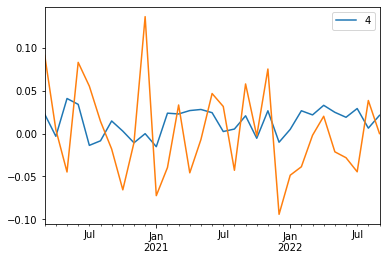

In [292]:
predicted.index = returns_test.index
predicted.plot()
returns_test['4'].plot()

In [298]:
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression() #Import linear regression
model = RandomForestRegressor()

predicted = pd.DataFrame()
R2 = []
RMSE = []
for stock in returns_train.columns:
    x_train = pd.concat([op_train[stock],adv_train[stock],technical_train[stock]],axis=1)
    y_train = returns_train[stock]
    model.fit(x_train,y_train)
    R2.append(model.score(x_train,y_train))

    x_test = pd.concat([op_test[stock],adv_test[stock],technical_test[stock]],axis=1)
    y_pred = model.predict(x_test)

    rmse = math.sqrt(np.square(np.subtract(returns_test[stock].values.reshape(-1,1),y_pred)).mean()) #Compute RMSE of the model
    RMSE.append(rmse)

    predicted[stock] = y_pred
    

In [306]:
R2

[0.8254319572999276,
 0.8353326353299979,
 0.838745696799762,
 0.8574776985778211,
 0.8330989848438882,
 0.861448742922742,
 0.8413324048650914,
 0.8177058991241644,
 0.8330956230924331,
 0.8305871050217324,
 0.8360701480923816,
 0.8358463560853088,
 0.8262228816131394,
 0.8391976234740584,
 0.8331316668903653,
 0.840275651050747,
 0.8285628621106726,
 0.8646542321154682,
 0.851084938513023,
 0.8273965640391329,
 0.8332064108148629,
 0.8310503748100485,
 0.835834414650171,
 0.8462326719739189,
 0.8280163155589291,
 0.830148584136991,
 0.8206923356290663,
 0.831514329329772,
 0.8323783660889148,
 0.8574086011235418,
 0.8156142367993099,
 0.8248301162232969,
 0.8088321782596662,
 0.8437034844085469,
 0.8413003648369667,
 0.8668430081316619,
 0.8261647353177972,
 0.8138372184630298,
 0.8359177854666735,
 0.856214594024798,
 0.830178401341741,
 0.8343307956890365,
 0.8237854590665714,
 0.8623798708550295,
 0.8251576006586125,
 0.8296588802365104,
 0.8347483542336095,
 0.8165858517059076,
 

In [301]:
predicted.index = returns_test.index

In [302]:
predicted['4'].corr(returns_test['4'])

0.12252136747374671

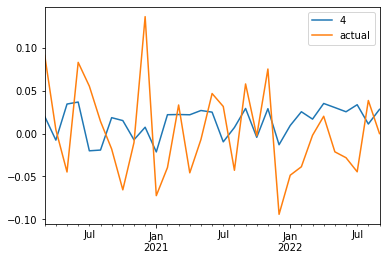

In [303]:
predicted['4'].plot()
returns_test['4'].plot(label = 'actual')
plt.legend()

In [228]:
RMSE

[0.055284681955536645,
 0.06073351677464521,
 0.057306870091988316,
 0.05116680483388668,
 0.11703883713584443,
 0.09813605960057954,
 0.07947717114001697,
 0.06173603945768972,
 0.23372663871721167,
 0.05470544084344952,
 0.06105760559537906,
 0.06408925263706464,
 0.0458068508748466,
 0.11350982431396815,
 0.06084681776585186,
 0.06288748721330971,
 0.19385408423794018,
 0.06280592755056973,
 0.04653582361369962,
 0.042063888306681584,
 0.06767425713706743,
 0.06955120857984132,
 0.06750259979578314,
 0.09216377802785826,
 0.08487073076110987,
 0.07167081365822425,
 0.04717015900902293,
 0.05130806736665546,
 0.042596786556070625,
 0.2135908230468512,
 0.06470262387308534,
 0.08407924808937503,
 0.057202970370741506,
 0.10000329820307184,
 10.103555379911004,
 0.10112490402678319,
 0.05486325787230822,
 0.11840379620594116,
 0.08645621057693599,
 0.2014454627111849,
 0.07139571542870411,
 0.04560016460917565,
 0.04588378538377487,
 0.2331839713010758,
 0.08454208175348472,
 0.0827321

In [221]:
x_train = pd.concat([op_train[stock],adv_train[stock],technical_train[stock]],axis=1)
x_train

,4,4,4
2010-01-31,0.000000,2.906721e+08,0.133703
2010-02-28,0.001849,3.651684e+08,0.199929
2010-03-31,-0.029900,3.888856e+08,0.204027
2010-04-30,-0.024384,4.085612e+08,0.219886
2010-05-31,-0.060570,4.706801e+08,0.236309
...,...,...,...
2018-07-31,0.067878,3.080579e+08,0.453697
2018-08-31,0.024323,2.800733e+08,0.336002
2018-09-30,0.086950,2.837846e+08,0.331406
2018-10-31,-0.052207,4.895092e+08,0.314057
